<a href="https://colab.research.google.com/github/Jenil020/python/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load it using the correct filename
df = pd.read_csv('test.csv')


Saving test.csv to test.csv


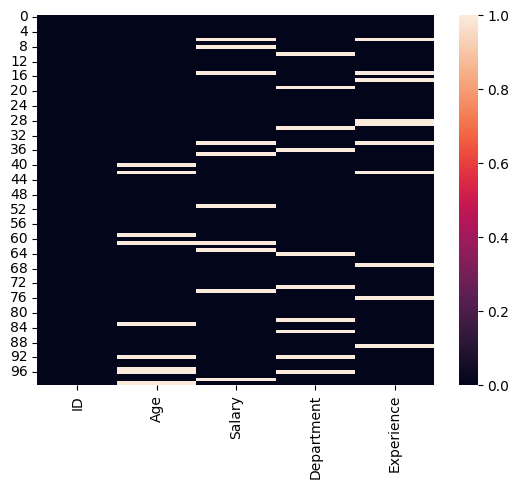

In [ ]:
df.isnull().sum() # count all null values
(df.isnull().sum().sum()/df.shape[0]*df.shape[1])*100 # how many percent null values contain in each coloumn
sns.heatmap(df.isnull()) # null values plot
plt.show()

,ID,Age,Salary,Department,Experience
0,1,32.5,500000.00,Tech,6.0
1,2,99.0,46634.84,Tech,6.7
2,3,33.2,47258.28,HR,40.0
3,4,37.6,43581.78,Admin,4.3
4,5,28.8,48709.71,HR,4.1


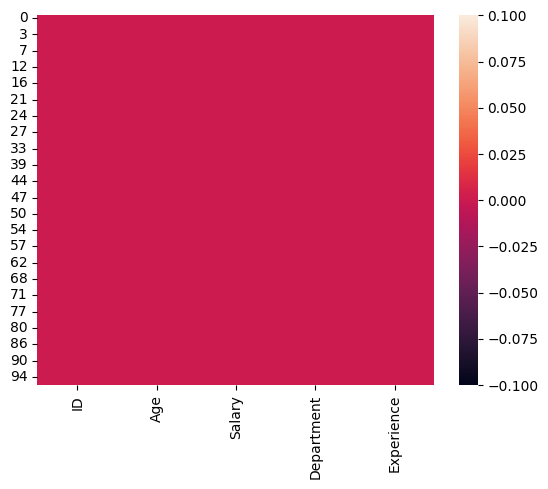

In [ ]:
df.dropna(inplace=True) #remove all rows which take null values
display(df.head(5))
sns.heatmap(df.isnull())
plt.show()

In [ ]:
df['Age'].mode()[0]
df['Age'] = df['Age'].fillna(df['Age'].mode()[0]) #fill only age coloumns missing values
df.isnull().sum()

,0
ID,0
Age,0
Salary,0
Department,0
Experience,0


In [ ]:
#fill missing value
df.fillna(method="ffill") #forward filling missing value row wise
df.fillna(method="bfill") #backward filling missing value row wise
df.fillna(method="ffill",axis=1) #forward filling missing value column wise
df.fillna(method="bfill",axis=1) #backward filling missing value column wise

/tmp/ipython-input-25-3559784914.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill") #forward filling missing value row wise


,ID,Age,Salary,Department,Experience
0,1,32.5,500000.00,Tech,6.0
1,2,99.0,46634.84,Tech,6.7
2,3,33.2,47258.28,HR,40.0
3,4,37.6,43581.78,Admin,4.3
4,5,28.8,48709.71,HR,4.1
...,...,...,...,...,...
90,91,30.5,46427.88,Finance,5.2
91,92,34.8,56851.19,Finance,3.6
93,94,28.4,40034.09,Tech,4.7
94,95,28.0,51385.45,Finance,3.3


In [ ]:
df.info()
df.select_dtypes(include="object").columns #object type data contains


<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 0 to 97
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          68 non-null     int64  
 1   Age         68 non-null     float64
 2   Salary      68 non-null     float64
 3   Department  68 non-null     object 
 4   Experience  68 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.2+ KB


Index(['Department'], dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer

# Create the imputer to fill missing categorical values with the most frequent value
si = SimpleImputer(strategy="most_frequent")

# Get all categorical columns (object dtype)
categorical_columns = df.select_dtypes(include="object").columns

# Fit and transform those columns
df[categorical_columns] = si.fit_transform(df[categorical_columns])

display(df[categorical_columns])


,Department
0,Tech
1,Tech
2,HR
3,Admin
4,HR
...,...
90,Finance
91,Finance
93,Tech
94,Finance


In [2]:
#Encoding (convert categorical data into numerical)
#(one hot encode using get dummies)
en_data = df[["Department"]]
pd.get_dummies(en_data)


,Department_Admin,Department_Finance,Department_HR,Department_Tech
0,False,False,False,True
1,False,False,False,True
2,False,False,True,False
3,True,False,False,False
4,False,False,True,False
...,...,...,...,...
95,False,False,False,True
96,False,False,False,False
97,False,False,False,True
98,False,False,True,False


In [10]:
from sklearn.preprocessing import OneHotEncoder
#one hot encoding using oneHotEncoder class of scikitlearn
ohe = OneHotEncoder()
ar =ohe.fit_transform(en_data).toarray()  #convert sparce matrix to an array
pd.DataFrame(ar , columns=["Department_Admin","Department_Finance","Department_HR","Department_Tech","Department_Management"])

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0.

,Department_Admin,Department_Finance,Department_HR,Department_Tech,Department_Management
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
95,0.0,0.0,0.0,1.0,0.0
96,0.0,0.0,0.0,0.0,1.0
97,0.0,0.0,0.0,1.0,0.0
98,0.0,0.0,1.0,0.0,0.0


In [12]:
#Label Encoding (for nominal data)
df = pd.DataFrame({"name" : ["cow","dog","parrot","donkey"]})
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["en_name"]= le.fit_transform(df["name"])
df

,name,en_name
0,cow,0
1,dog,1
2,parrot,3
3,donkey,2


In [14]:
#Encoding for ordinal data
df =pd.DataFrame({"Size" : ["s","l","xl","m","xxl"]})
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[["s","m","l","xl","xxl"]])
df["en_size"] = oe.fit_transform(df[["Size"]])
df

,Size,en_size
0,s,0.0
1,l,2.0
2,xl,3.0
3,m,1.0
4,xxl,4.0


<Axes: xlabel='Salary'>

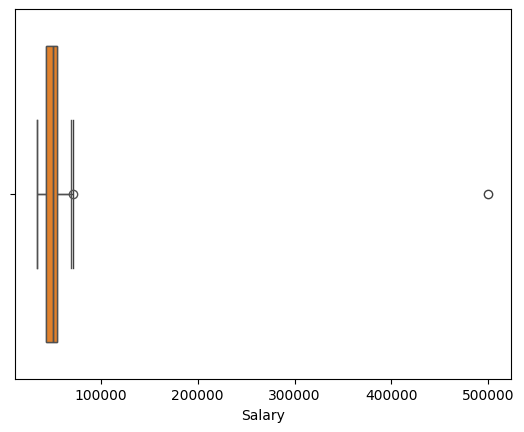

In [24]:
#Remove Outliers from dataset
df = pd.read_csv('test.csv')
df.describe()
sns.boxplot(x="Salary", data=df)

# Q1 is 25% of data , Q3 is 75% of data
#IQR= Q3-Q1 (Inter qurtile range)
#min = Q3 - 1.5 * IQR , Max = Q3 + 1.5 * IQR (out of min and max data is Outliers)
q1 = df["Salary"].quantile(0.25)
q3 = df["Salary"].quantile(0.75)
iqr = q3-q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr
new_dataset = df[df['Salary']<=max]
sns.boxplot(x="Salary", data=new_dataset)


/tmp/ipython-input-27-171276360.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Salary"])
/tmp/ipython-input-27-171276360.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dataset["Salary"])
/tmp/ipython-input-27-171276360.py:11: UserWarning: Boolean Series key will be reindexed to

<Axes: xlabel='Salary', ylabel='Density'>

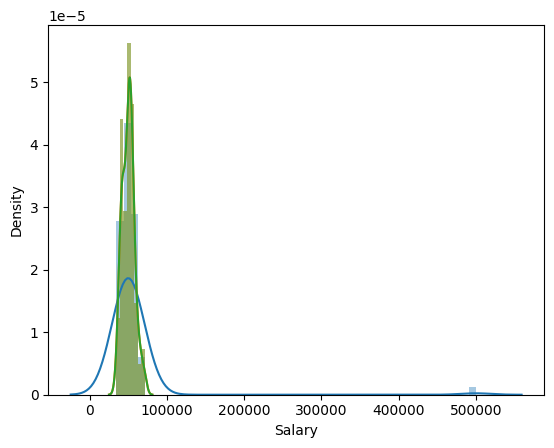

In [27]:
#Remove Outliers with z score
sns.distplot(df["Salary"])
#min = mean - 3rd std. deviation , max = mean + 3rd std deviation
min = df["Salary"].mean() - 3*df["Salary"].std()
max = df["Salary"].mean() + 3*df["Salary"].std()
new_dataset = df[df['Salary']<=max]
new_dataset = new_dataset[new_dataset['Salary']>=min]
sns.distplot(new_dataset["Salary"])

#Outlier removal with zscore
z_score = (df["Salary"]-df["Salary"].mean())/df["Salary"].std()
new_dataset = df[(z_score <= 3) & (z_score >= -3)]
sns.distplot(new_dataset["Salary"])